In [177]:
# Importation des Librairies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Importation des CSV
pop = pd.read_csv('population.csv') 
sousN = pd.read_csv('sous_nutrition.csv')
dpa = pd.read_csv('dispo_alimentaire.csv')
aideA = pd.read_csv('aide_alimentaire.csv')


# enlever les NaN et les remplacer par Zéro 
sousN = sousN.fillna(0) 
pop = pop.fillna(0)

# enlever le signe (‘<’)
sousN['Valeur'] = pd.to_numeric(sousN['Valeur'], errors='coerce')

# Désigne le Format de donnée
sousN['Valeur']=sousN['Valeur'].astype(float) 
pop['Valeur']=pop['Valeur'].astype(float) 

# Choix de date 2017
sousN = sousN[sousN.Année == '2016-2018'] 
pop = pop[pop.Année == 2017] 

# Les zones groupés et sommes des dispos

dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

# La proportion de personnes en état de sous-nutrition

In [178]:
# Calcul des proportions de personnes en sous nutrition
total = round((sousN['Valeur'].sum() / (pop['Valeur'].sum())*1000)*100,2) # Arrondi a 2 chiffres aprés la virgule pour total
print('proportion de personnes en sous nutrition', total, '%')  

proportion de personnes en sous nutrition 7.1 %


# Le nombre théorique de personnes qui pourraient être nourries à la disponibilité alimentaire mondiale


In [179]:
# Jointure Disponibilité Alimentaire et Population
Jointure = pd.merge(dpa, pop,
         on='Zone') 

# Création Index Jointure
Jointure = Jointure [['Valeur','Disponibilité alimentaire (Kcal/personne/jour)','Zone','Origine']]

# Calcul du Kcal journalier dispo avec le nombres de personnes sur terre
Jointure['kcalj'] = Jointure['Disponibilité alimentaire (Kcal/personne/jour)']* Jointure ['Valeur']* 1000
    
# Population pouvant être nourries    
Personne = round(Jointure['kcalj'].sum() /2500)

#Population mondiale
popMondiale = round(pop['Valeur'].sum() *1000) 

# Pourcentage de personnes pouvant être nourries
Resultat = Personne/popMondiale*100 

# Arrondi du pourcentage de personnes pouvant être nourries
Resultat = round(Resultat) 

# Afficher une phrase d'explication
print("La disponibilité alimentaire est de "+str(Resultat)+"% pour la population mondiale.") 
print("Les Kcalj sont de "+str(Jointure['kcalj'].sum()))

La disponibilité alimentaire est de 111% pour la population mondiale.
Les Kcalj sont de 20918984627331.0


# Le nombre théorique de personnes qui pourraient être nourries à la disponibilité alimentaire vegetale mondiale

In [180]:
# Jointure Disponibilité Alimentaire et Population
Jointure = pd.merge(dpa, pop, on='Zone')

# Uniquement pour Origine => Vegetale
Jointure = Jointure[Jointure['Origine']== 'vegetale']

# détails de la jointure
Jointure = Jointure [['Valeur','Disponibilité alimentaire (Kcal/personne/jour)','Zone','Origine']] # détails de la jointure

# Calcul du Kcal journalier dispo avec le nombres de personnes sur terre
Jointure['kcalj'] = Jointure['Disponibilité alimentaire (Kcal/personne/jour)']* Jointure ['Valeur']* 1000

# Population pouvant être nourries avec la dispo vegetale
Personne = round(Jointure['kcalj'].sum() /2500) 

#Population mondiale
popMondiale = round(pop['Valeur'].sum() *1000) 

# Pourcentage de personnes pouvant être nourries a la dispo vegetale
Resultat = Personne/popMondiale*100 

# Arrondi
Resultat = round(Resultat)

# Afficher une phrase d'explication
print("La disponibilité alimentaire vegetale est de "+str(Resultat)+"% pour la population mondiale.") 
print("Les Kcalj sont de "+str(Jointure['kcalj'].sum()))

La disponibilité alimentaire vegetale est de 91% pour la population mondiale.
Les Kcalj sont de 17260764211501.0


# L’utilisation de la disponibilité intérieure attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

Text(0.5, 0, 'Pourcentages')

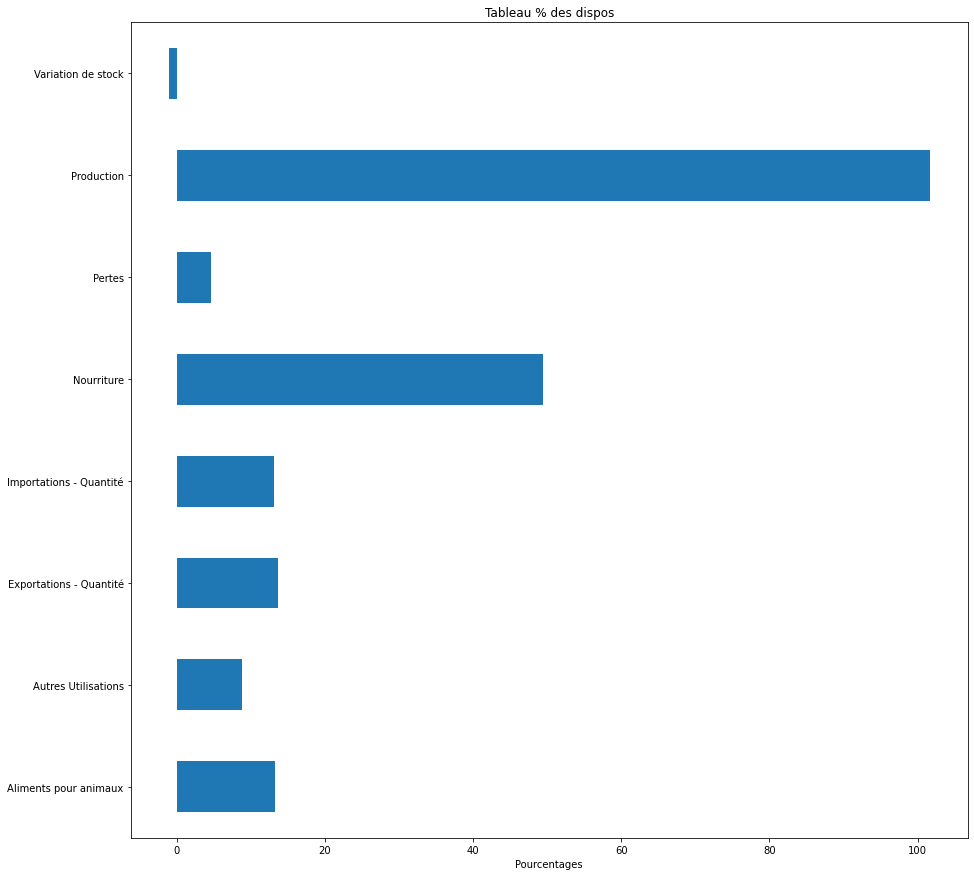

In [181]:
# Jointure Disponibilité Alimentaire et Population
Jointure = pd.merge(dpa, pop, on='Zone')

# Affichage des lignes et des colonnes à partir de la 3
DispoAlimentaire = dpa.iloc[:,3:].sum()

# Somme des DispoINT 
DispoINT =dpa["Disponibilité intérieure"].sum()

# Calcul Ratio Animaux
RatioAnimaux = round (dpa["Aliments pour animaux"].sum() / DispoINT * 100,2 )

# Calcul Ratio Nourriture
RatioNourriture = round (dpa["Nourriture"].sum() / DispoINT * 100,2 )

# Calcul Ratio Pertes
RatioPerte = round (dpa["Pertes"].sum() / DispoINT * 100,2 )

# calcul à partir de la colonne 3
dpa.iloc[:,3:].sum()

# Choix des colonnes
DispoAlimentaire_2 = DispoAlimentaire[["Aliments pour animaux", "Autres Utilisations", "Exportations - Quantité", "Importations - Quantité" , "Nourriture" , "Pertes" , "Production" , "Variation de stock" ]]/DispoINT*100

# Choix des graphiques 
DispoAlimentaire_2.plot(kind = "barh",figsize = (15,15))
plt.title ("Tableau % des dispos")
plt.xlabel('Pourcentages')

In [182]:
# Les zones groupés et sommes des dispos

dpa = dpa.groupby('Zone')
dpa = dpa['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

# Choix du C.S.V
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

# les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 :

In [183]:
# Choix de date 2017
sousN = sousN[sousN.Année == '2016-2018'] 
pop = pop[pop.Année == 2017] 

# enlever les NaN et les remplacer par Zéro 
sousN = sousN.fillna(0) 
pop = pop.fillna(0)

# Jointure Disponibilité Sous_nutrition et Population
tableauSousN = pd.merge(sousN, pop, on='Zone')

# Calcul des proportions
tableauSousN ['proportion'] = round (((tableauSousN['Valeur_x']/ tableauSousN ['Valeur_y'])*1000)*100,2)

# Choix des colonnes
TabProportion = tableauSousN [['Zone', 'proportion']]

# Décroissant limité à 20 résultats
TabProportion.sort_values(['proportion'], ascending = [False]).head(20)

,Zone,proportion
78,Haïti,48.26
157,République populaire démocratique de Corée,47.19
108,Madagascar,41.06
103,Libéria,38.28
100,Lesotho,38.25
183,Tchad,37.96
161,Rwanda,35.06
121,Mozambique,32.81
186,Timor-Leste,32.17
0,Afghanistan,28.93


# Les pays qui ont le plus bénéficié d’aide depuis 2013 :

Text(0, 0.5, 'Aide alimentaire')

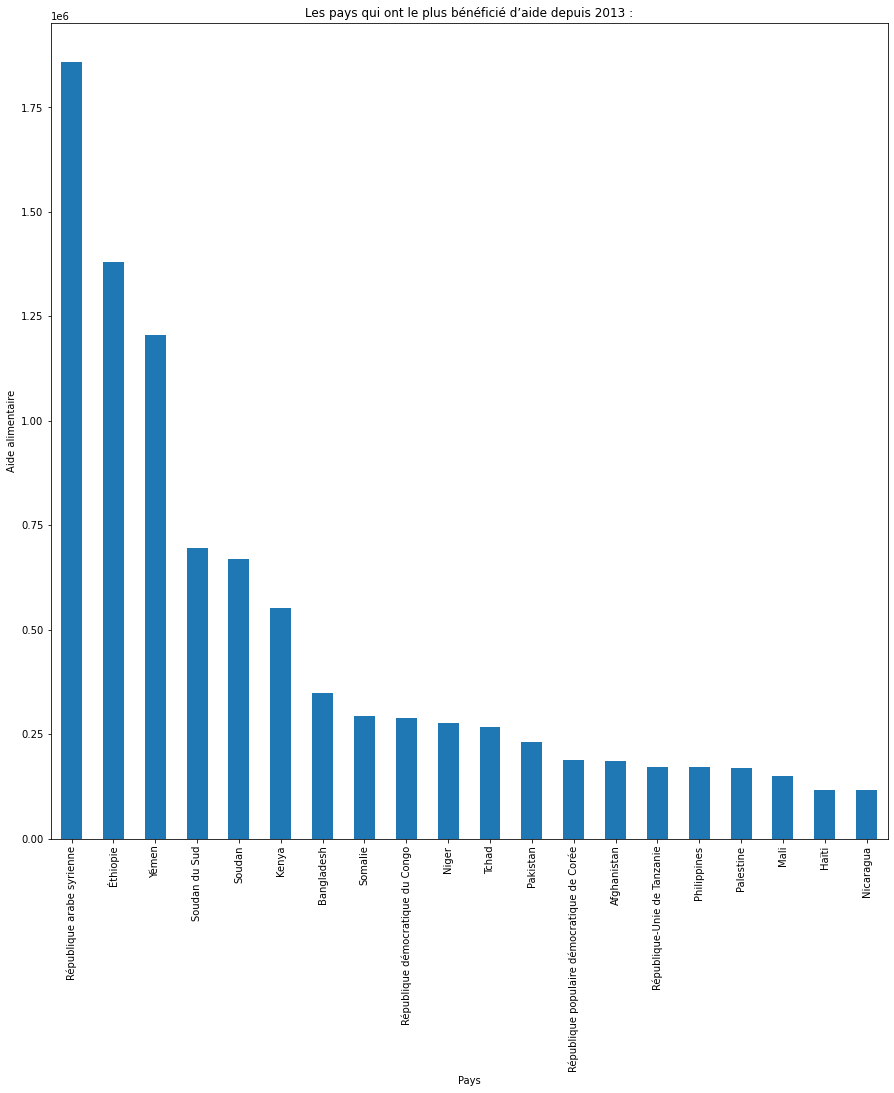

In [133]:
# Pays groupé du plus aidé au moins aidé
PaysAide = aideA.groupby('Pays bénéficiaire').sum()

# Création du graphique
PaysAide.Valeur.sort_values( ascending = [False]).head(20).plot(kind='bar',figsize = (15,15))
plt.title ("Les pays qui ont le plus bénéficié d’aide depuis 2013 :")
plt.xlabel('Pays')
plt.ylabel('Aide alimentaire')

# Les pays ayant le moins de disponibilité/habitant :

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Pays')

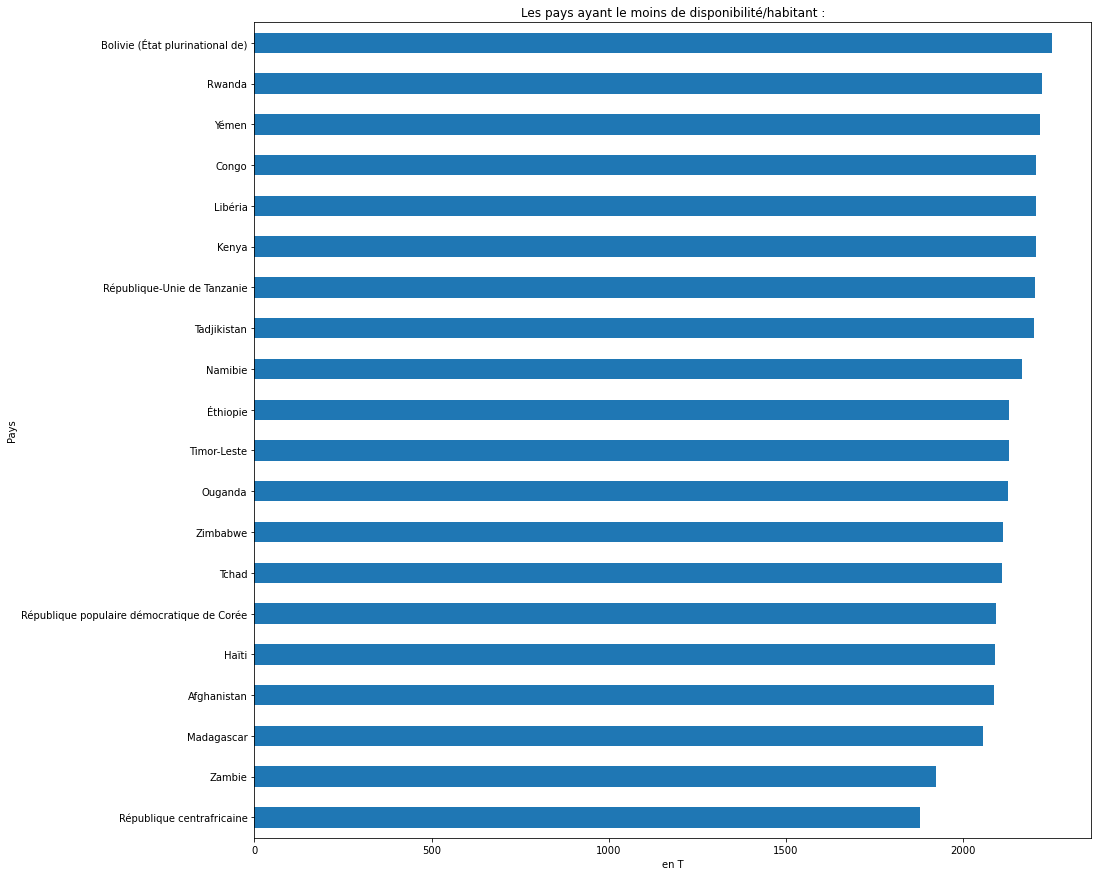

In [185]:
# Calcul des pays en dispo/habitant croissant

# Création d'un graphique
print(dpa.sort_values (ascending = True).head(20).plot(kind='barh',figsize = (15,15)))
plt.title ("Les pays ayant le moins de disponibilité/habitant :")
plt.xlabel('en T')
plt.ylabel('Pays')

# Les pays ayant le plus de disponibilité/habitant :

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Pays')

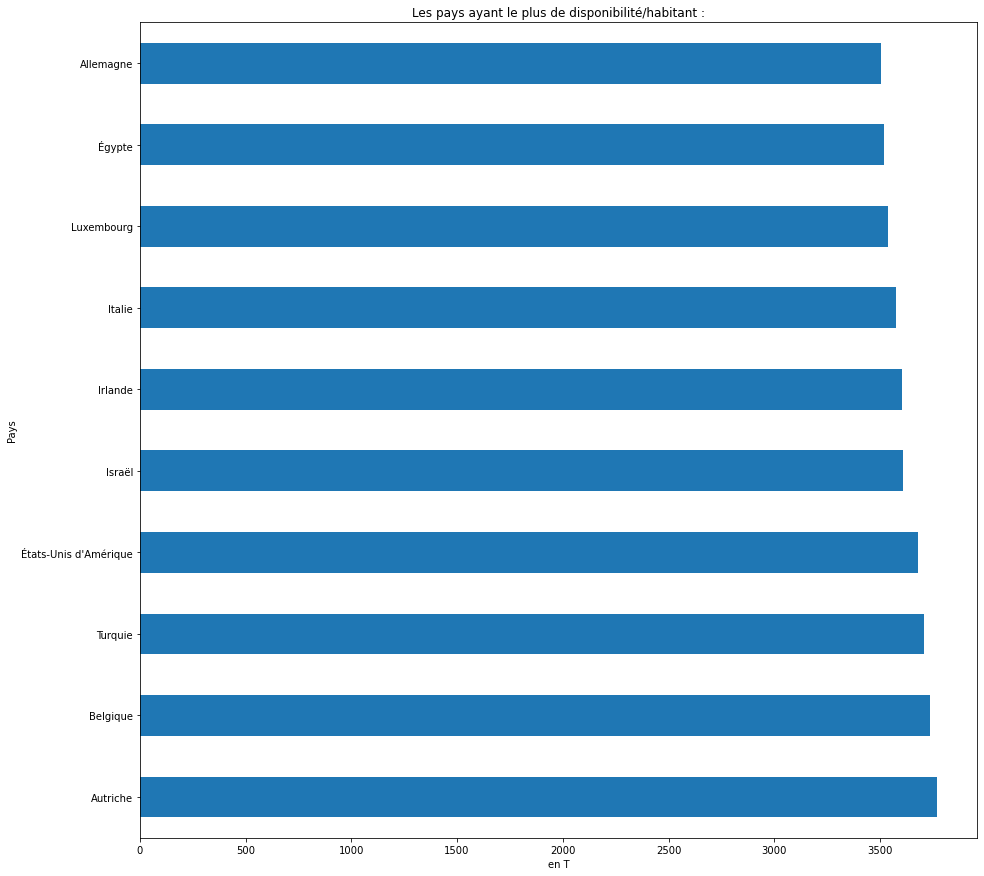

In [186]:
# Calcul des pays en dispo/habitant décroissant

# Création du graphique
print(dpa.sort_values (ascending = False).head(10).plot(kind='barh',figsize = (15,15)))
plt.title ("Les pays ayant le plus de disponibilité/habitant :")
plt.xlabel('en T')
plt.ylabel('Pays')

In [136]:
# Création table dispo total pays / j
dispo_pays_total = dispo_alimentaire[['Zone','Produit','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()

# Visu de la dispo alimentaire total / j
dispo_pays_total.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)").head(10)


,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


In [137]:
#Création d'une table uniquement composé des céréales
liste_cereales = ["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits",
                  "Avoine", "Millet et produits", "Sorgho et produits", "Céréales, Autres"]

#Uniquement dans la liste composé de céréales
cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(liste_cereales),:] 


In [138]:
# Calcul du % de céréales pour les aliments pour animaaux
Resultat = cereales['Aliments pour animaux'].sum()*100/cereales['Disponibilité intérieure'].sum()

# visu des céréales pour les aliments pour animaaux
print("Les aliments pour animaux correspondent à "+str(Resultat)+"% de la disponiblité intérieure en cereales.") 

Les aliments pour animaux correspondent à 69.33506248526291% de la disponiblité intérieure en cereales.


In [139]:
# Calcul des cereales pour la dispo interieur
Resultat_2 = cereales['Nourriture'].sum()*100/cereales['Disponibilité intérieure'].sum()

# Visu  des cereales pour la dispo interieur
print("Les cereales correspondent à "+str(Resultat_2)+"% de la disponiblité intérieur.") 

Les cereales correspondent à 18.130550970683014% de la disponiblité intérieur.


# L'exportation, L'importation, la Dispo et les pertes du manioc en Thailande

In [140]:
# Création table thai_manioc pour le type de produit Manioc et le Pays Thaïlande
thai_manioc = dispo_alimentaire.loc[(dispo_alimentaire['Produit'] == "Manioc") & (dispo_alimentaire['Zone'] == "Thaïlande"),:]

# Visu pour le type de produit Manioc et le Pays Thaïlande
print('Proportion de manioc exportée :', "{:.2f}".format(thai_manioc['Exportations - Quantité'].iloc[0]*100 / 
                                                                     thai_manioc['Production'].iloc[0]), "%")

Proportion de manioc exportée : 83.41 %


<AxesSubplot:>

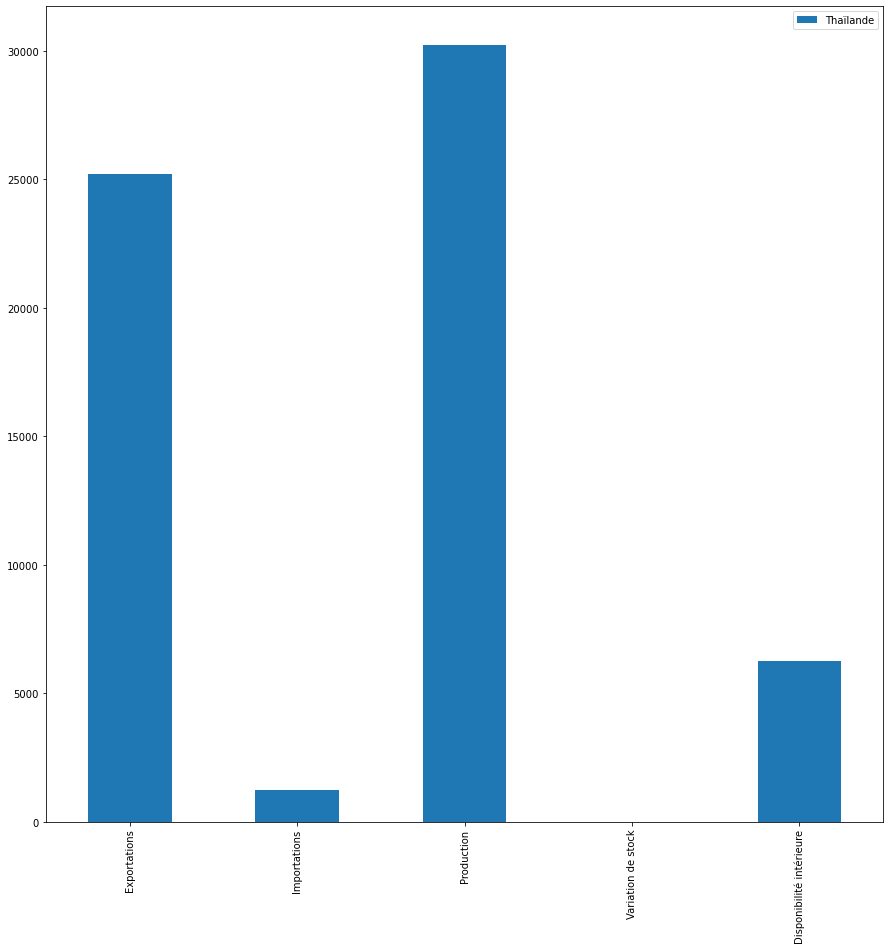

In [172]:
# Choix index = Thaïlande
thai_manioc.index = ['Thaïlande']

# choix des Loc pour le graph
DF = pd.DataFrame()
DF.loc ['Exportations' , 'Thaïlande' ] = thai_manioc['Exportations - Quantité'][0]
DF.loc ['Importations' , 'Thaïlande' ] = thai_manioc['Importations - Quantité'][0]
DF.loc ['Production' , 'Thaïlande' ] = thai_manioc['Production'][0]
DF.loc ['Variation de stock' , 'Thaïlande' ] = thai_manioc['Variation de stock'][0]
DF.loc ['Disponibilité intérieure' , 'Thaïlande' ] = thai_manioc['Disponibilité intérieure'][0]

# Histogramme avec Production + Importations – Exportations + Variation de stock 
DF.plot.bar(y = 'Thaïlande', figsize=(15,15))


In [160]:
thai_manioc.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Thaïlande,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


<AxesSubplot:ylabel='Thaïlande'>

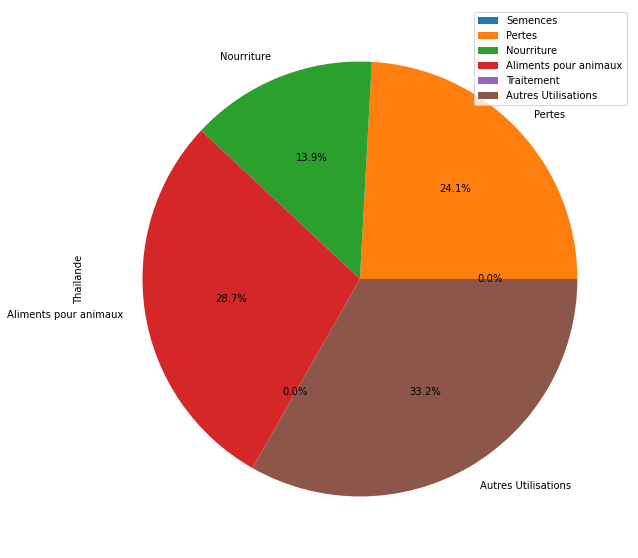

In [156]:
# Head thai manioc
thai_manioc.head()

# Loc pour le graphique
DF_2 = pd.DataFrame()
DF_2.loc ['Semences' , 'Thaïlande' ] = thai_manioc['Semences'][0]
DF_2.loc ['Pertes' , 'Thaïlande' ] = thai_manioc['Pertes'][0]
DF_2.loc ['Nourriture' , 'Thaïlande' ] = thai_manioc['Nourriture'][0]
DF_2.loc ['Aliments pour animaux' , 'Thaïlande' ] = thai_manioc['Aliments pour animaux'][0]
DF_2.loc ['Traitement' , 'Thaïlande' ] = thai_manioc['Traitement'][0]
DF_2.loc ['Autres Utilisations' , 'Thaïlande' ] = thai_manioc['Autres Utilisations'][0]

# Création du graphique
DF_2.plot.pie(y = 'Thaïlande', figsize=(10,10),autopct = '%1.1f%%')

# Taux de sous nutrition par Continent en 2017:

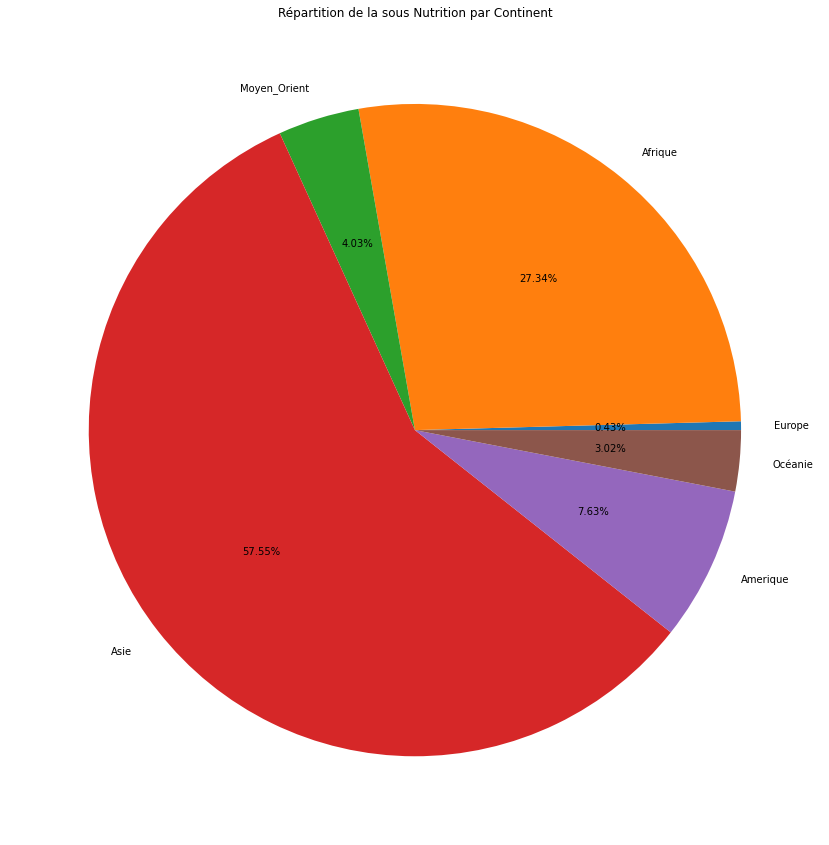

In [162]:
# ouverture du C.S.V pour sous nutrition
sn = pd.read_csv('sous_nutrition.csv')

# remplace les <0,1 par 0
sn.Valeur= sn['Valeur'].replace(['<0.1'], '0.00')

# mets les cellules valeur en float
sn.Valeur = sn.Valeur.astype(float)

# Modifie les NaN en 0
sn = sn.fillna(0)

# Mets les valeur Sn valeur à jour
sn['Valeur'] = sn['Valeur']*1000

# Pour l'année 2017
sn = sn[sn.Année == '2016-2018'] 

# Création des listes par continent
Europe = ['Albanie', 'Allemagne', 'Andorre', 'Autriche', 'Bélarus', 'Belgique', 'Bosnie-Herzégovine', 'Bulgarie', 'Chypre', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France', 'Gibraltar', 'Grèce', 'Hongrie', 'Île de Man', 'Îles Anglo-Normandes', 'Îles Féroé', 'Irlande', 'Islande', 'Italie', 'Lettonie', 'Liechtenstein', 'Lituanie', 'Luxembourg', 'Macédoine du Nord', 'Malte', 'Monaco', 'Monténégro', 'Norvège', 'Pays-Bas', 'Pologne', 'Portugal', 'République de Moldova', 'Roumanie', 'Royaume-Uni de Grande-Bretagne et d Irlande du Nord', 'Saint-Marin', 'Saint-Siège', 'Serbie', 'Slovaquie', 'Slovénie', 'Suède', 'Suisse', 'Tchéquie', 'Ukraine']
Afrique = ['Afrique du Sud', 'Algérie', 'Angola', 'Bénin', 'Botswana', 'Burkina Faso', 'Burundi', 'Bénin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroun', 'Comores', 'Congo', 'Côte d Ivoire', 'Djibouti', 'Égypte', 'Érythrée', 'Eswatini', 'Éthiopie', 'Gabon', 'Gambie', 'Ghana', 'Guinée', 'Guinée équatoriale', 'Guinée-Bissau', 'Kenya', 'Lesotho', 'Libéria', 'Libye', 'Madagascar', 'Malawi', 'Mali', 'Maroc', 'Maurice', 'Mauritanie', 'Mayotte', 'Mozambique', 'Namibie', 'Niger', 'Nigéria', 'Ouganda', 'République centrafricaine', 'République démocratique du Congo', 'République-Unie de Tanzanie', 'Réunion', 'Rwanda', 'Sahara occidental', 'Sainte-Hélène Ascension et Tristan da Cunha', 'Sao Tomé-et-Principe', 'Sénégal', 'Seychelles', 'Sierra Leone', 'Somalie', 'Soudan', 'Soudan du Sud', 'Tchad', 'Togo', 'Tunisie', 'Zambie', 'Zimbabwe']
Moyen_Orient = ['Afghanistan', ' Arabie Saoudite', 'Bahreïn', 'Émirats arabes unis', 'Iran (République islamique d)', 'Iraq', 'Israël', 'Jordanie', 'Koweït', 'Oman', 'Palestine', 'Qatar', 'République arabe syrienne', 'Turquie', 'Yémen']
Asie = ['Arménie', 'Azerbaïdjan', 'Bangladesh', 'Bhoutan', 'Brunéi Darussalam', 'Cambodge', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine continentale', 'Chine Taiwan Province de', 'Fédération de Russie', 'Inde', 'Indonésie', 'Japon', 'Kazakhstan', 'Kirghizistan', 'Kiribati', 'Liban', 'Malaisie', 'Maldives', 'Mongolie', 'Myanmar', 'Népal', 'Ouzbékistan', 'Pakistan', 'République de Corée', 'République démocratique populaire lao', 'République populaire démocratique de Corée', 'Singapour', 'Sri Lanka', 'Tadjikistan', 'Thaïlande', 'Timor-Leste', 'Turkménistan', 'Viet Nam']
Amerique = ['Anguilla', 'Antigua-et-barbuda', 'Antille Néerlandaise', 'Argentine', 'Aruba', 'Bahamas', 'Barbade', 'Belize', 'Bermudes', 'Bolivie (État plurinational de)', 'Bonaire Saint-Eustache et Saba', 'Brésil', 'Canada', 'Chili', 'Colombie', 'Costa Rica', 'Cuba', 'Curaçao', 'Dominique', 'El Salvador', 'Équateur', 'États-Unis d Amérique', 'Géorgie', 'Grenade', 'Groenland', 'Guadeloupe', 'Guatemala', 'Guyana', 'Guyane française', 'Haïti', 'Honduras', 'Îles Caïmanes', 'Îles Falkland (Malvinas)', 'Îles Turques-et-Caïques', 'Îles Vierges américaines', 'Îles Vierges britanniques', 'Jamaïque', 'Martinique', 'Mexique', 'Montserrat', 'Nicaragua', 'Panama', 'Paraguay', 'Pérou', 'Porto Rico', 'République dominicaine', 'Saint-Barthélemy', 'Sainte-Lucie', 'Saint-Kitts-et-Nevis', 'Saint-Martin (partie française)', 'Saint-Vincent-et-les Grenadines', 'Sint Maarten  (partie néerlandaise)', 'Suriname', 'Trinité-et-Tobago', 'Uruguay', 'Venezuela (République bolivarienne du)']
Oceanie = ['Australie', 'Fidji', 'Guam', 'Îles Cook', 'Îles Mariannes du Nord', 'Îles Marshall', 'Îles Salomon', 'Îles Wallis-et-Futuna', 'Micronésie (États fédérés de)', 'Nauru', 'Nioué', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Palaos', 'Papouasie-Nouvelle-Guinée', 'Philippines', 'Polynésie française', 'Saint-Pierre-et-Miquelon', 'Samoa', 'Samoa américaines', 'Tokélaou', 'Tonga', 'Tuvalu', 'Vanuatu']

# Round Isin par continent pour calculer
Europe = round((sn[sn.Zone.isin(Europe)]['Valeur'].sum() / (pop['Valeur'].sum()))*100,2)
Afrique = round((sn[sn.Zone.isin(Afrique)]['Valeur'].sum() / (pop['Valeur'].sum()))*100,2)
Moyen_Orient = round((sn[sn.Zone.isin(Moyen_Orient)]['Valeur'].sum() / (pop['Valeur'].sum()))*100,2)
Asie = round((sn[sn.Zone.isin(Asie)]['Valeur'].sum() / (pop['Valeur'].sum()))*100,2)
Amerique = round((sn[sn.Zone.isin(Amerique)]['Valeur'].sum() / (pop['Valeur'].sum()))*100,2)
Oceanie = round((sn[sn.Zone.isin(Oceanie)]['Valeur'].sum() / (pop['Valeur'].sum()))*100,2)

# création d'un graphique Pie en pourcentage
Graphique = plt.figure(figsize = (15, 15))
plt.pie(
  [Europe, Afrique, Moyen_Orient, Asie, Amerique, Oceanie],
    labels = ['Europe', 'Afrique', 'Moyen_Orient', 'Asie', 'Amerique', 'Océanie'],
    autopct = lambda x: str(round(x,2)) + '%')   
plot = plt.title('Répartition de la sous Nutrition par Continent')

# Montrer le graphique
plt.show()